# Car-Number plate Detection and Recognition

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pytesseract

In [188]:
# Read the image file

image = cv2.imread('54.jpg')


In [189]:
import matplotlib as mpl

def plotting(image, cmap = None):
    if cmap == 'gray':
        height, width = image.shape
    else:      
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape
        
    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    
     # Display the image.
    plt.imshow(image, cmap)

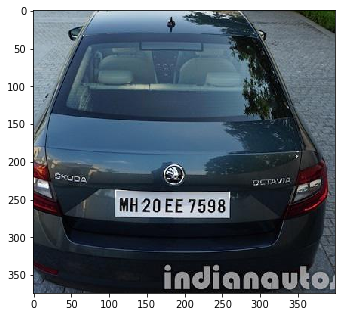

In [190]:

plotting(image)

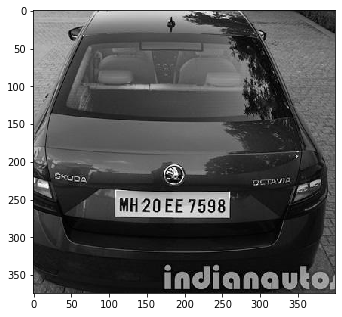

In [191]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plotting(gray)

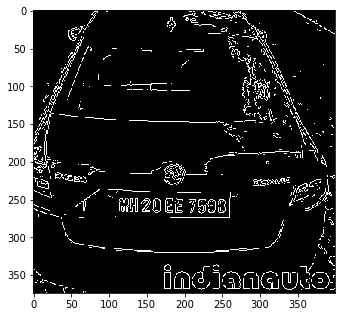

In [192]:
#Canny Edge Detection
canny_edge = cv2.Canny(gray, 170, 200)
plotting(canny_edge)

In [193]:
# Find contours based on Edges
contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]


In [194]:

# Initialize license Plate contour and x,y coordinates
contour_with_license_plate = None
license_plate = None
x = None
y = None
w = None
h = None


In [195]:
# Find the contour with 4 potential corners and creat ROI around it
for contour in contours:
        # Find Perimeter of contour and it should be a closed contour
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
        if len(approx) == 4: #see whether it is a Rect
            contour_with_license_plate = approx
            x, y, w, h = cv2.boundingRect(contour)
            license_plate = gray[y:y + h, x:x + w]
            break

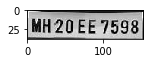

In [196]:
plotting(license_plate)

In [197]:
def cleanup_text(text):
# strip out non-ASCII text so we can draw the text on the image
# using OpenCV
    return "".join([c if ord(c) < 128 else "" for c in text]).strip()

In [198]:
# Removing Noise from the detected image, before sending to Tesseract
license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)


In [199]:
#Text Recognition
text = pytesseract.image_to_string(license_plate,config="--psm 7")
#Draw License Plate and write the Text
image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 3) 
image = cv2.putText(image, cleanup_text(text), (x-50,y-25), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,0), 2, cv2.LINE_AA)


In [200]:
print("License Plate :", text)

License Plate : MH20EE 7598



In [201]:
cv2.imshow("License Plate Detection",image)
cv2.waitKey(0)



-1